# TOY PROBLEM

Here we generate dummy calcium fluorescence images that are easy to sgment. The data for our toy problem.

In [2]:
import numpy as np
import pylab as plt
import matplotlib.pyplot as mplt
from scipy.misc import imread, imsave
from glob import glob
from PIL import Image

from skimage import data, color
%matplotlib inline

/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [304]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [305]:
noisy_movies, shifted_movies = generate_movies(n_samples=1200)

There are 1200 noisy movies of 15 frames each. They are 40px by 40px and single channel (greyscale)

(array([12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 24, 24, 24,
       24, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27,
       27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 36,
       36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38,
       38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39]), array([26, 27, 28, 29, 30, 31, 37, 38, 39, 26, 27, 28, 29, 30, 31, 37, 38,
       39, 26, 27, 28, 29, 30, 31, 37, 38, 39, 26, 27, 28, 29, 30, 31, 37,
       38, 39, 26, 27, 28, 29, 30, 31,

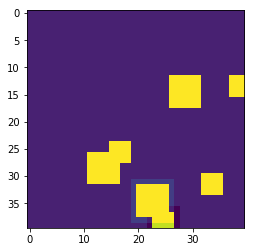

In [307]:
one_pic = noisy_movies[0][0]
print(np.nonzero(one_pic))
mplt.figure()
mplt.imshow(np.reshape(one_pic, (1,40,40))[0])
mplt.show()

In [30]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)
    # FOR EACH VIDEO
    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        # FOR NUMBER OF OBJECTS IN THE VIDEO
        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart 
                y_shift = ystart 
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1 (ground truth movie)
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    #noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    #shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies


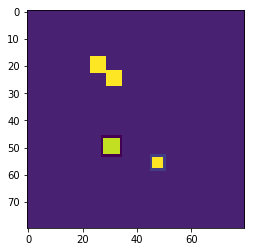

In [31]:
noisy_movies, shifted_movies = generate_movies(n_samples=1)
one_pic = noisy_movies[0][0]
mplt.figure()
#reshape so it can be drawn
mplt.imshow(np.reshape(one_pic, (1,one_pic.shape[0],one_pic.shape[0]))[0])
mplt.show()

In [32]:
noisy_movies.shape

(1, 15, 80, 80, 1)

(512, 512, 3)


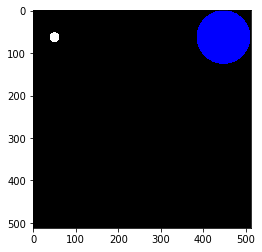

(512, 512)


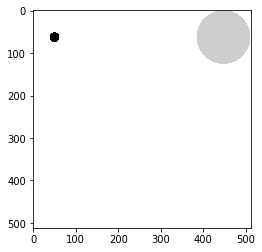

255

In [288]:
img = np.zeros((512,512,3), np.uint16)
array = cv2.circle(img,(447,63), 63, (0,0,255), -1)
new = cv2.circle(array,(50,63), 12, (255,255,255), -1)
gray_image = cv2.cvtColor(new, cv2.COLOR_BGR2GRAY)
print(new.shape)
mplt.imshow(new)
mplt.show()

mplt.imshow(gray_image, cmap = "Greys")
print(gray_image.shape)
mplt.show()

np.max(new)

In [196]:
def hex_to_RGB(hex):
    ''' "#FFFFFF" -> [255,255,255] '''
    # Pass 16 to the integer function for change of base
    return [int(hex[i:i+2], 16) for i in range(1,6,2)]

def RGB_to_hex(RGB):
    ''' [255,255,255] -> "#FFFFFF" '''
    # Components need to be integers for hex to make sense
    RGB = [int(x) for x in RGB]
    return "#"+"".join(["0{0:x}".format(v) if v < 16 else
            "{0:x}".format(v) for v in RGB])

def color_dict(gradient):
    return {"hex":[RGB_to_hex(RGB) for RGB in gradient],
        "r":[RGB[0] for RGB in gradient],
        "g":[RGB[1] for RGB in gradient],
        "b":[RGB[2] for RGB in gradient]}


def linear_gradient(start_hex = "#000000" , finish_hex="#FFFFFF", n=10):
    s = hex_to_RGB(start_hex)
    f = hex_to_RGB(finish_hex)
  # Initilize a list of the output colors with the starting color
    RGB_list = [s]
  # Calcuate a color at each evenly spaced value of t from 1 to n
    for t in range(1, n):
    # Interpolate RGB vector for color at the current value of t
        curr_vector = [
            int(s[j] + (float(t)/(n-1))*(f[j]-s[j]))
            for j in range(3)
        ]
    # Add it to our list of output colors
        RGB_list.append(curr_vector)

    return color_dict(RGB_list)

In [197]:
def random_color():
    rgbl=[255,0,0]
    np.random.shuffle(rgbl)
    return tuple(rgbl)

In [200]:
linear_gradient()

{'b': [0, 28, 56, 85, 113, 141, 170, 198, 226, 255],
 'g': [0, 28, 56, 85, 113, 141, 170, 198, 226, 255],
 'hex': ['#000000',
  '#1c1c1c',
  '#383838',
  '#555555',
  '#717171',
  '#8d8d8d',
  '#aaaaaa',
  '#c6c6c6',
  '#e2e2e2',
  '#ffffff'],
 'r': [0, 28, 56, 85, 113, 141, 170, 198, 226, 255]}

In [356]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 100
    col = 100
    #noisy_movies = np.zeros((n_samples, n_frames, row, col), np.uint16)
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    groundtruth_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    # FOR EACH VIDEO
    for i in range(n_samples):
        # Add 10 to 30 neurons
        n = np.random.randint(3, 8)
        n = 5

        # FOR NUMBER OF neurons IN THE VIDEO
        for j in range(n):
            # Initial position
            xstart = np.random.randint(5, row-5)
            ystart = np.random.randint(5, col-5)
         
            # Size of the square
            w = np.random.randint(7, 10)

            for t in range(n_frames):
                #colour gradient
                colour = random_color()
                factor = (t+(n^2))*5

                new = cv2.circle(noisy_movies[i, t],(xstart, ystart), w, factor, -1)
                #new = cv2.circle(noisy_movies[i, t],(xstart, ystart), w, factor, -1)

                #print(np.max(new))
                new[new>0] = factor
                #print(new.shape)
                #mplt.imshow(new)
                #mplt.show()
                print(np.max(new))

                noisy_movies[i, t] = new/np.max(new)
                #print(noisy_movies[i,t])
                #mplt.imshow(gray_image)
                #mplt.show()
                #print(noisy_movies.shape)

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
#                 if np.random.randint(0, 2):
#                     noise_f = (-1)**np.random.randint(0, 2)
#                     noisy_movies[i, t,
#                                  x_shift - w - 1: x_shift + w + 1,
#                                  y_shift - w - 1: y_shift + w + 1,
#                                  0] += noise_f * 0.1

#                 # Shift the ground truth by 1
#                 x_shift = xstart + directionx * (t + 1)
#                 y_shift = ystart + directiony * (t + 1)
#                 groundtruth_movies[i, t, x_shift - w: x_shift + w,
#                                y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    #noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    #shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    #noisy_movies[noisy_movies >= 1] = 1
    #groundtruth_movies[groundtruth_movies >= 1] = 1
    return noisy_movies, groundtruth_movies

15.0
0.0
0.0
0.0
35.0
40.0
45.0
50.0
55.0
0.0
65.0
70.0
75.0
80.0
0.0


/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


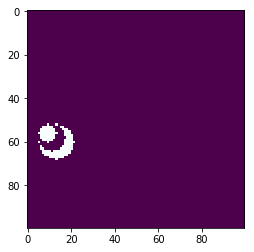

/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/matplotlib/image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/matplotlib/image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/pelonomi/anaconda3/envs/tensorflowenv/lib/python3.5/site-

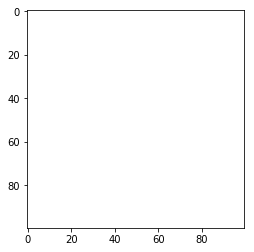

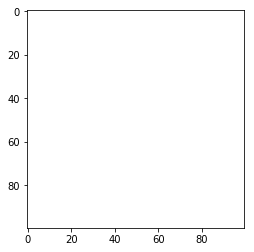

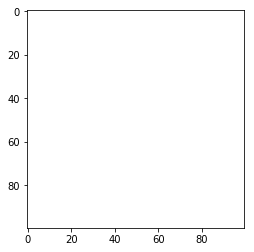

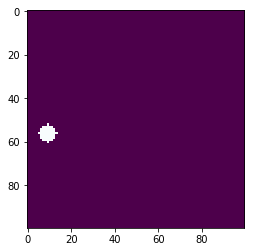

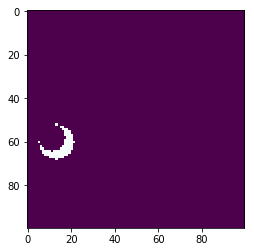

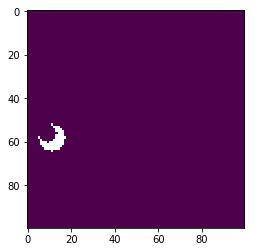

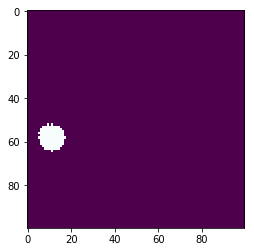

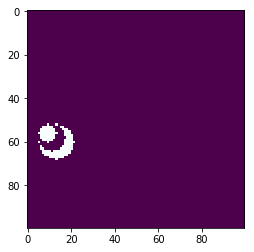

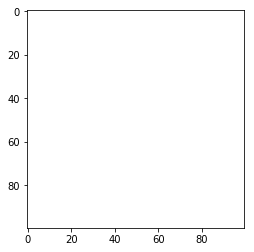

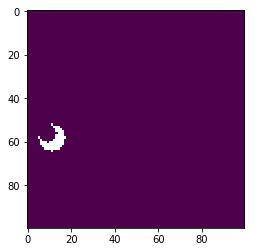

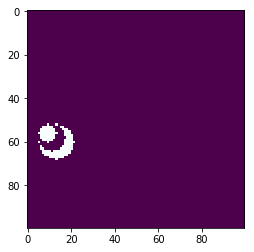

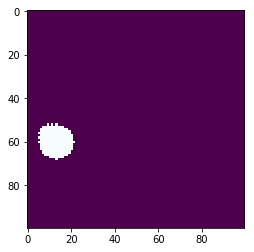

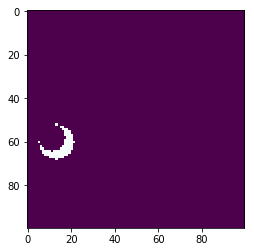

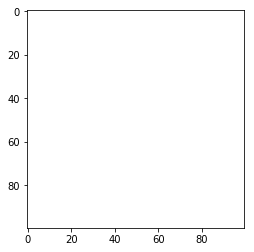

In [357]:
noisy_movies, shifted_movies = generate_movies(n_samples=1)
one_pic = noisy_movies[0][0]
mplt.figure()
#reshape so it can be drawn
for arr in noisy_movies[0]: 
    plot = np.reshape(arr, (1,arr.shape[0],arr.shape[0]))
    mplt.imshow(plot[0], cmap=plt.cm.BuPu_r)
    mplt.show()

In [355]:
picture = noisy_movies[0][2]
print(picture.shape)
picture[np.nonzero(picture)]

(100, 100, 1)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

<class 'numpy.ndarray'>


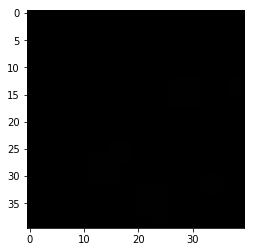

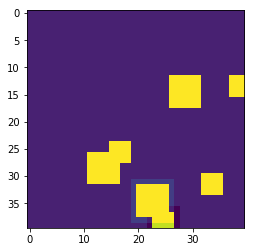

In [322]:
ar =np.reshape(picture, (1,40,40))
ar = ar[0]
from PIL import Image
print(type(ar))
im = Image.fromarray(ar)
mplt.imshow(im)
mplt.show()

mplt.imshow(ar)
mplt.show()



In [256]:

def display_image(image, size = (5,5)):
    fig = plt.figure(figsize=size)
    x = len(image)
    y = len(image[0])
    img = np.zeros((x, y))
    for row in range(x):
        for col in range(y):
            img[row,col] = image[row][col][0]

    plt.imshow(img, cmap = 'gray')
    plt.show()

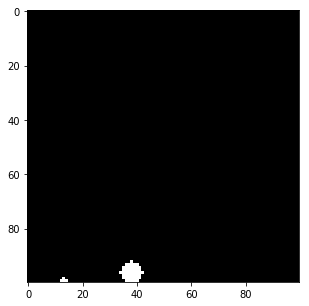

In [259]:
display_image(picture,(5,5))

# VIDEO SYNTHESIS

FRAME SYNTHESIS

So this is a function which creates a plot that has a gaussian blur around each of the neurons based on a gaussian value and a standard deviation value. It produces one frame at a time

In [2]:
import numpy as np
import sys


def f(x,y,x0,y0,sx,sy):
    return np.exp(-(x-x0)**2/2./sx**2 -(y-y0)**2/2./sy**2)

def draw_frame(sx,sy, data, gaus_blur):
    # gaus_blur FLOAT: the amount of spread of the glowing dot
    # sx, sy FLOAT: standard deviation (degree of blur spread)
    # data LIST: a list of x,y co-ordiante pairs of the positions of the neurons
    #gaus_blur = 5.
    xmin = data[0][0]
    xmax = data[0][0]
    ymin = data[0][1]
    ymax = data[0][1]
    for i in range(1, len(data)):
        if(data[i][0] < xmin):
            xmin = data[i][0]
        if(data[i][0] > xmax):
            xmax = data[i][0]
        if(data[i][1] < ymin):
            ymin = data[i][1]
        if(data[i][1] > ymax):
            ymax = data[i][1]

    xmin -= gaus_blur*sx
    xmax += gaus_blur*sx
    ymin -= gaus_blur*sy
    ymax += gaus_blur*sy

    dx = (xmax - xmin) / 250.
    dy = (ymax - ymin) / 250.
    #print(dx)
    #print(dy)

    xar = []
    yar =[]
    val = []
    xvar_var = 0
    yvar_var = 0
    for i in np.arange(xmin,xmax+dx, dx):
        xvar_var += (xmax+dx)
        for j in np.arange(ymin,ymax+dy, dy):
            yvar_var += (ymax+dy)
            s = 0.
            for k in range(0, len(data)):
                d2 = (i - data[k][0])**2 + (j - data[k][1])**2
                if( d2 < (gaus_blur*sx)**2 + (gaus_blur*sy)**2):
                    s += f(i,j,data[k][0],data[k][1],sx,sy)
            xar.append(i)
            yar.append(j)
            val.append(s)
    
    

    fig = mplt.figure(frameon=False)
    ax = fig.add_axes([0.,0.,1.,1.])
    ax.set_axis_off()
    
    #ax.axis('off')
    fig.add_axes(ax)
    mplt.scatter(xar, yar, c=val, cmap = "Greys_r")
    
    fig.canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    mplimage = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
    mplt.close(fig)
    gray_image = color.rgb2gray(mplimage)
    
    # The slicing is necessary to get rid of the white frame
    slice_val = 16
    crop_img = gray_image[slice_val:-slice_val, slice_val:-slice_val]

    return crop_img


            #print (i, j, s)

DATA SYNTHESIS

The create a frame function requires a set of datapoints defined by x-y positions to be plotted on the scatterplot and to calculate the gaussian blur arpund the plot.

In [3]:
def synthesize_datapoints(number_neurons, img_size):
    # number_neurons LIST: the range of minimum and maximum neurons in an image sequence
    # img_size LIST: the size of the image, mim max positions of neurons
    n_neurons = np.random.randint(number_neurons[0],number_neurons[1])
    data = []
    xmax = 0
    ymax = 0
    for n in range(n_neurons):
        xpos = np.random.randint(0, img_size[0])
        ypos = np.random.randint(0, img_size[1])
        data.append([xpos,ypos])
        if xmax < xpos:
            xmax = xpos
        if ymax < ypos:
            ymax = ypos
    return data

Here we are creating a test dataset with the dataset function

In [4]:
n_neurons = [6,10]
image_size = [15,10]
data4plot = synthesize_datapoints(n_neurons, image_size)
len(data4plot)

9

Here we test to see what the image looks like for a video sample. 

In [5]:
#sx and sy determine the size of the dot range [0.003 barely there 08 super big and blurry]
# sx and sy are the standard deviations
sx = 0.07
sy = sx
gausblur = 5
plot = draw_frame(sx,sy,data4plot, gausblur)

In [6]:
data = np.histogram2d(plot[2], plot[1], weights=plot[3])

TypeError: Invalid dimensions for image data

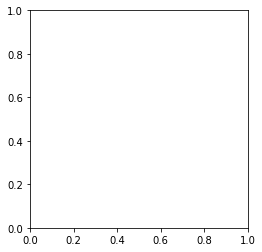

In [7]:
mplt.imshow(plot[0], cmap = "Greys_r")
mplt.show()
plot[0].shape

In [ ]:
long_plot = np.expand_dims(plot, axis = -1)
long_plot.shape

LABEL SYNTHESIS

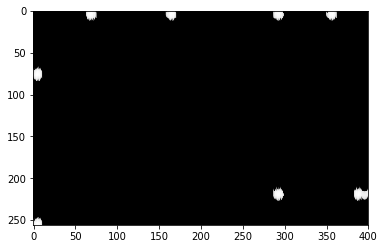

(256, 400)

In [281]:
#sx and sy determine the size of the dot range [0.003 barely there 08 super big and blurry]
# sx and sy are the standard deviations
sx = 0.2
sy = sx
gausblur = 0.7
data4plot, [max_x, max_y] = synthesize_datapoints(n_neurons, image_size)
plot = draw_frame(sx,sy,data4plot, gausblur)
mplt.imshow(plot, cmap = "Greys_r")
mplt.show()
plot.shape

VIDEO AND LABEL PAIR SYNTHESIS

This creates n_samples number of video sequences of length n_frames (defined by std deviations) as well as the label image which is calculated using a different standard deviation

Here We generate our movies which is an array of (n_samples, n_frames, row, col, 1).
We increment the std value for a number of frames and then decrease it again to create a glowing calcium response effect. They are not spontaneous. The responses are going to happen all at the same time.

In [8]:
import multiprocessing

In [9]:
def make_data():
    pool = multiprocessing.Pool(processes=2)
    std_array = [0.003, 0.015, 0.035, 0.040, 0.045, 0.050, 0.055, 0.06, 0.07, 0.08, 0.09]
    #n_frames is the length of the std array *2
    n_samples = 50
    n_frames = len(std_array)*2
    row = 256
    col = 400

    n_neurons = [6,10]
    image_size = [15,10]

    gausblur_vids = 5.
    gausblur_label = 0.7

    neuron_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    movie_segs = np.zeros((n_samples, 1, row, col, 1), dtype=np.float)

    for sample in range(n_samples):
        frame_n = 0 #this is a counter so that when we reveres the array we still have the right index
        data4plot = synthesize_datapoints(n_neurons, image_size)

        for std in std_array:
            frame = draw_frame(std,std, data4plot, gausblur_vids)
            neuron_movies[sample, frame_n ] = np.expand_dims(frame, axis = -1)
            frame_n +=1
        for std in reversed(std_array):
            frame = draw_frame(std,std,data4plot, gausblur_vids)
            neuron_movies[sample, frame_n ] = np.expand_dims(frame, axis = -1)
            frame_n +=1
        label = draw_frame(0.2,0.2, data4plot, gausblur_label)
        label[label>0] = 1
        movie_segs[sample, 0] = np.expand_dims(label, axis = -1)
    return neuron_movies, movie_segs

Check what is inside

In [38]:
import cProfile

In [51]:
cProfile.run('make_data()')

         46819634 function calls (46812780 primitive calls) in 79.980 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      699    0.001    0.000    0.002    0.000 <frozen importlib._bootstrap>:995(_handle_fromlist)
    43795    0.247    0.000    0.247    0.000 <ipython-input-48-01d2307863b4>:5(f)
       23   21.393    0.930   79.909    3.474 <ipython-input-48-01d2307863b4>:8(draw_frame)
        1    0.000    0.000    0.000    0.000 <ipython-input-49-30c0ca3d4a24>:1(synthesize_datapoints)
        1    0.029    0.029   79.980   79.980 <ipython-input-50-58577d1432de>:1(make_data)
        1    0.000    0.000   79.980   79.980 <string>:1(<module>)
     1242    0.001    0.000    0.003    0.000 <string>:12(__new__)
       69    0.000    0.000    0.000    0.000 __init__.py:1155(__init__)
       23    0.000    0.000    0.000    0.000 __init__.py:1176(__init__)
       69    0.000    0.000    0.000    0.000 __init__.py:1206(push)
   

       92    0.001    0.000    0.005    0.000 core.py:4482(ravel)
      115    0.000    0.000    0.000    0.000 core.py:596(filled)
      115    0.000    0.000    0.010    0.000 core.py:6350(array)
       92    0.001    0.000   16.888    0.184 core.py:6568(__call__)
       69    0.000    0.000    0.000    0.000 core.py:669(getdata)
       23    0.000    0.000    0.001    0.000 core.py:7763(asarray)
       92    0.001    0.000   16.883    0.184 core.py:7813(asanyarray)
      322    0.000    0.000    0.000    0.000 cycler.py:138(keys)
      322    0.000    0.000    0.000    0.000 cycler.py:225(__iter__)
     3054    0.002    0.000    0.002    0.000 cycler.py:227(<genexpr>)
      276    0.004    0.000    0.007    0.000 cycler.py:349(by_key)
      552    0.000    0.000    0.000    0.000 cycler.py:371(<genexpr>)
       23    0.000    0.000    0.000    0.000 decorators.py:41(wrapper)
       23    0.000    0.000    0.000    0.000 dtype.py:124(_dtype_itemsize)
       46    0.000    0.000    0.

       46    0.000    0.000    0.001    0.000 transforms.py:282(frozen)
       92    0.000    0.000    0.003    0.000 transforms.py:286(__array__)
      184    0.002    0.000    0.003    0.000 transforms.py:2909(nonsingular)
       23    0.000    0.000    0.000    0.000 transforms.py:341(p1)
       46    0.000    0.000    0.001    0.000 transforms.py:350(xmin)
       46    0.000    0.000    0.001    0.000 transforms.py:357(ymin)
       46    0.000    0.000    0.001    0.000 transforms.py:364(xmax)
       46    0.000    0.000    0.001    0.000 transforms.py:371(ymax)
      161    0.000    0.000    0.000    0.000 transforms.py:392(intervalx)
      161    0.000    0.000    0.000    0.000 transforms.py:400(intervaly)
       23    0.000    0.000    0.000    0.000 transforms.py:409(width)
       23    0.000    0.000    0.000    0.000 transforms.py:418(height)
  138/115    0.001    0.000    0.005    0.000 transforms.py:436(bounds)
       23    0.000    0.000    0.002    0.000 transforms.py:53

In [19]:
neuron_movies, movie_segs = make_data()

In [14]:
print(neuron_movies.shape)
print(movie_segs.shape)

(50, 22, 256, 400, 1)
(50, 1, 256, 400, 1)


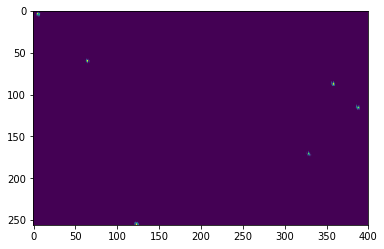

In [305]:
check = neuron_movies[0][19]
to_draw = check.reshape(1, check.shape[0], check.shape[1])
mplt.imshow(to_draw[0])
mplt.show()

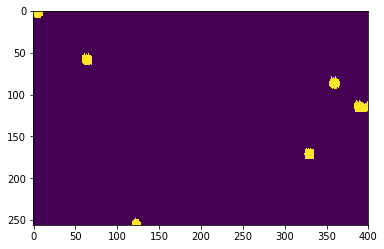

In [306]:
check_label = movie_segs[0][0]
to_draw = check_label.reshape(1, check_label.shape[0], check_label.shape[1])
mplt.imshow(to_draw[0])
mplt.show()

SAVE DATA...because it takes too long to generate

In [15]:
image_ar.shape, label_ar.shape

((125, 22, 256, 400, 1), (125, 1, 256, 400, 1))

In [12]:
movies.shape, labels.shape

NameError: name 'movies' is not defined

In [41]:
image_ar = np.load("image_sequences.npy")
label_ar = np.load("labels.npy" )

In [16]:
movies = np.append(neuron_movies, image_ar, axis =0)
labels = np.append(movie_segs, label_ar, axis = 0)
movies.shape, labels.shape

((175, 22, 256, 400, 1), (175, 1, 256, 400, 1))

In [17]:
np.save("image_sequences.npy", movies)
np.save("labels.npy", labels )

In [18]:
image_ar = np.load("image_sequences.npy")
label_ar = np.load("labels.npy" )
image_ar.shape, label_ar.shape

((175, 22, 256, 400, 1), (175, 1, 256, 400, 1))

So it turned out that these image arrays that I made, makes a lot of data. SO I am going to put what I have into separate files so that I can use a generator to call them

In [19]:
image_ar = np.load("image_sequences225.npy")
label_ar = np.load("labels225.npy" )
image_ar.shape, label_ar.shape

((225, 22, 256, 400, 1), (225, 1, 256, 400, 1))

In [24]:
sample_nb = 0
for image in label_ar:
    np.save("dummies/label_" + str(sample_nb)+".npy" , image)
    sample_nb +=1

In [26]:
sample_nb = 0
for vid in image_ar:
    np.save("dummies/video_" + str(sample_nb)+".npy" , vid)
    sample_nb +=1